In [28]:
!nvidia-smi

Thu Oct 30 00:47:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.57                 Driver Version: 581.57         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 Ti   WDDM  |   00000000:01:00.0  On |                  N/A |
| 30%   40C    P2             29W /  160W |    4127MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import torch
print(torch.cuda.is_available()) # Should print True
print(torch.version.cuda)       # Should print 12.6
exit()                          # Exit the Python interpreter

True
12.6


: 

In [19]:
!pip install "unstructured[pdf]" 
!pip install qwen-vl-utils



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/32.3 MB ? eta -:--:--
   -- ------------------------------------- 1.8/32.3 MB 17.9 MB/s eta 0:00:02
   ----------- ---------------------------- 9.4/32.3 MB 30.9 MB/s eta 0:00:01
   ----------------- ---------------------- 14.4/32.3 MB 27.3 MB/s eta 0:00:01
   ------------------------------ --------- 24.4/32.3 MB 33.5 MB/s eta 0:00:01
   ---------------------------------------- 32.3/32.3 MB 35.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from unstructured.partition.pdf import partition_pdf

file_path = r"Examples\1706.03762v7.pdf"

chunks = partition_pdf(
    filename=file_path, # path to the PDF file to be partitioned
    infer_table_structure=True, #enables automatic detection and structuring of tables within the document
    strategy="hi_res", #most accurate, but potentially slowest and most resource-intensive, strategy for analyzing a document's layout and content
    extract_image_block_types=["Image", "Tables"], #extracts images and tables locally
    extract_image_block_output_dir="images", #saves images and tables to the specified directory
    extract_image_block_to_payload=True, #metadata with base64
    chunking_strategy="by_title",
    max_characters=10000,
    combine_text_under_n_chars=2000,
    new_after_n_chars=6000,
)

c:\Users\sauca\Desktop\Bachelors\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The requested type (Tables) doesn't match any available type


In [5]:
len(chunks)  # number of document chunks created

12

In [6]:
chunks[1].metadata.orig_elements

In [7]:
chunks[0].to_dict()

{'type': 'CompositeElement',
 'element_id': '6d0161ac1b5f7a8963824054fab6e1e1',
 'text': '3\n\n2023\n\n2\n\n0\n\n2\n\ng u A 2 ] L C . s c [ 7 v 2 6 7 3 0 . 6 0\n\n7\n\n1\n\n:\n\nv\n\narXiv\n\ni\n\nX\n\nr\n\na\n\nProvided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.\n\nAttention Is All You Need\n\nAshish Vaswani∗\n\nGoogle Brain\n\navaswani@google.com\n\nNoam Shazeer∗ Google Brain noam@google.com\n\nNiki Parmar∗ Google Research nikip@google.com\n\nJakob Uszkoreit∗\n\nGoogle Research usz@google.com\n\nLlion Jones∗\n\nGoogle Research llion@google.com\n\nAidan N. Gomez∗ † University of Toronto aidan@cs.toronto.edu\n\nŁukasz Kaiser∗ Google Brain lukaszkaiser@google.com\n\nIllia Polosukhin∗ ‡\n\nillia.polosukhin@gmail.com\n\nAbstract\n\nThe dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a dec

In [8]:
elements = chunks[3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': 'd4cd8a05-860e-4bef-987c-b60e2539f217',
 'text': '',
 'metadata': {'coordinates': {'points': ((np.float64(486.0),
     np.float64(261.1805555555558)),
    (np.float64(486.0), np.float64(614.7805555555556)),
    (np.float64(664.0), np.float64(614.7805555555556)),
    (np.float64(664.0), np.float64(261.1805555555558))),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2025-10-25T16:29:38',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 4,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAFiALIDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJ

In [9]:
tables = []
texts= []
for chunk in chunks:
  if 'Table' in str(type(chunk)):
    tables.append(chunk)
  if 'CompositeElement' in str(type(chunk)):
    texts.append(chunk)

In [10]:
len(texts)

12

In [32]:
texts[1].to_dict()

{'type': 'CompositeElement',
 'element_id': 'a75d6f28cf5a6a688670eb9a314cb5eb',
 'text': '1 Introduction\n\nRecurrent neural networks, long short-term memory [13] and gated recurrent [7] neural networks in particular, have been firmly established as state of the art approaches in sequence modeling and transduction problems such as language modeling and machine translation [35, 2, 5]. Numerous efforts have since continued to push the boundaries of recurrent language models and encoder-decoder architectures [38, 24, 15].\n\nRecurrent models typically factor computation along the symbol positions of the input and output sequences. Aligning the positions to steps in computation time, they generate a sequence of hidden states ht, as a function of the previous hidden state ht−1 and the input for position t. This inherently sequential nature precludes parallelization within training examples, which becomes critical at longer sequence lengths, as memory constraints limit batching across exampl

In [11]:
print(texts[1])

1 Introduction

Recurrent neural networks, long short-term memory [13] and gated recurrent [7] neural networks in particular, have been firmly established as state of the art approaches in sequence modeling and transduction problems such as language modeling and machine translation [35, 2, 5]. Numerous efforts have since continued to push the boundaries of recurrent language models and encoder-decoder architectures [38, 24, 15].

Recurrent models typically factor computation along the symbol positions of the input and output sequences. Aligning the positions to steps in computation time, they generate a sequence of hidden states ht, as a function of the previous hidden state ht−1 and the input for position t. This inherently sequential nature precludes parallelization within training examples, which becomes critical at longer sequence lengths, as memory constraints limit batching across examples. Recent work has achieved significant improvements in computational efficiency through fact

In [12]:
def get_images_base64(chunks):
  image_64=[]
  for chunk in chunks:
    if 'CompositeElement' in str(type(chunk)):
      chunk_el =chunk.metadata.orig_elements
      for el in chunk_el:
        if 'Image' in str(type(el)):
          image_64.append(el.metadata.image_base64)
  return image_64
images = get_images_base64(chunks)

In [13]:
len(images)

7

In [16]:
images[0]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAOAAmADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK5OTxVqWp6pdWPhjSI75LSQw3N/d3PkW6yjrGpCszsOh

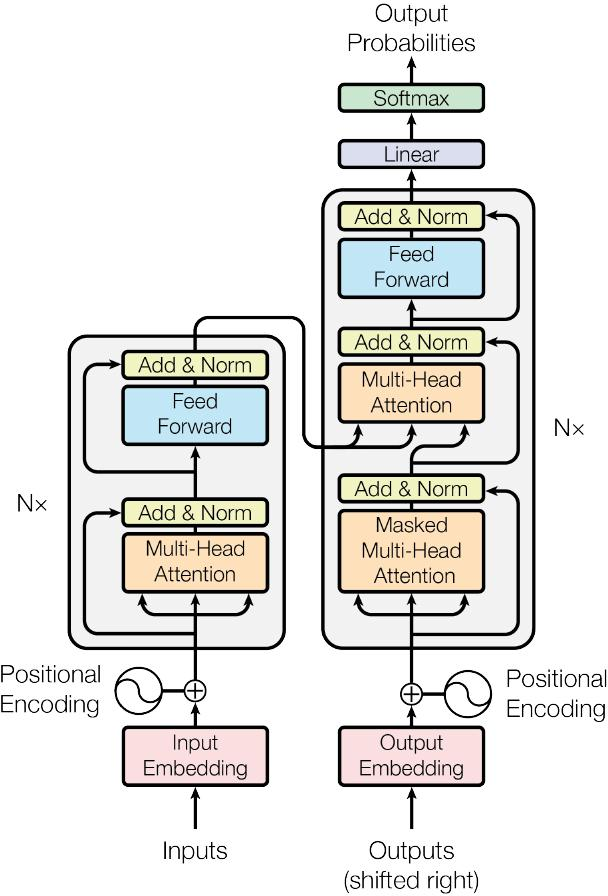

In [23]:
import base64
from IPython.display import Image, display

def display_image_base64(base64_code):
  image_data= base64.b64decode(base64_code) #decode base64 to binary
  display(Image(data=image_data))

display_image_base64(images[0])

In [15]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor, BitsAndBytesConfig
import torch

model_id = "Qwen/Qwen2-VL-2B-Instruct"
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_quant_type="nf4"
)
model = Qwen2VLForConditionalGeneration.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    device_map="auto",
    quantization_config = quant_config
)
min_pixels = 256*28*28
max_pixels = 488*28*28
processor = AutoProcessor.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct",
    min_pixels = min_pixels,
    max_pixels = max_pixels
)

save_directory = "./qwen2_vl_model"
model.save_pretrained(save_directory)
processor.save_pretrained(save_directory)
print("Model and processor saved to", save_directory)

`torch_dtype` is deprecated! Use `dtype` instead!
c:\Users\sauca\Desktop\Bachelors\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sauca\.cache\huggingface\hub\models--Qwen--Qwen2-VL-2B-Instruct. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Model and processor saved to ./qwen2_vl_model


In [34]:
from qwen_vl_utils import process_vision_info
prompt_images = """Describe the content of the image in detail.
For context,the image is part of a research paper explaining the transformers
architecture. Be specific about graphs, such as bar plots."""

message_images = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": "data:image;base64," + images[0]},
            {"type": "text", "text": prompt_images},
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    message_images, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(message_images)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

# Inference: Generation of the output
generated_ids = model.generate(**inputs, max_new_tokens=128)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)
print(output_text[0])

The image is a block diagram of a transformer architecture, which is a type of neural network used for sequence modeling tasks. The diagram shows the different components of the transformer architecture and how they interact with each other.

1. **Input Embedding**: The input to the transformer is an embedding vector. This vector is typically generated by a word embedding layer, which converts the input text into a fixed-length vector representation.

2. **Positional Encoding**: The input embedding vector is then passed through a positional encoding layer. Positional encoding is a technique used to encode the relative positions of words in a sequence. This is important because transformers learn dependencies between


In [ ]:
prompt_text = """You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}"""

final_prompt = prompt_text.format(element=texts[1])

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": final_prompt} 
        ],
    }
]

text = processor.apply_chat_template(
    messages, 
    tokenize=False, 
    add_generation_prompt=True
)

inputs = processor(
    text=[text],
    images=None,  # Explicitly state there are no images
    videos=None,
    padding=True,
    return_tensors="pt",
).to("cuda")

generated_ids = model.generate(**inputs, max_new_tokens=150) # Give it 150 tokens for a summary
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)

print("--- Generated Summary ---")
print(output_text[0]) 
    
    

--- Generated Summary ---
The Transformer is a model architecture that relies entirely on self-attention to compute representations of its input and output without using sequence-aligned recurrent neural networks or convolutional neural networks. The Transformer allows for significantly more parallelization and can reach a new state of the art in translation quality after being trained for as little as twelve hours on eight P100 GPUs.
